**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# Community detection algorithms

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to community detection in Python using the <code>networkx</code> library. 
    
## Imports and Settings

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import networkx as nx

In [3]:
import community as louvain
from community import modularity

<div class="alert alert-danger">
    You need the <code>python-louvain</code> library in your machine. This <a href=https://github.com/taynaud/python-louvain>page</a> might help you.
</div>

In [4]:
from itertools import cycle
def color_cycle():
    """
        This is a cycle of colors.
    """
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    return cycle(colors)
colors = color_cycle()

def to_community_list(node_community_dict):
    """
        This transforms {0: 0, 1: 1:, 2: 0, 3: 1} into [[0, 2], [1, 3]].
    """
    partition_dict = {}
    for v, k in zip(node_community_dict.keys(), node_community_dict.values()):
        if k not in partition_dict:
            partition_dict[k] = []
        partition_dict[k].append(v)
    return list(partition_dict.values())

# Community detection

In [5]:
network = nx.karate_club_graph()

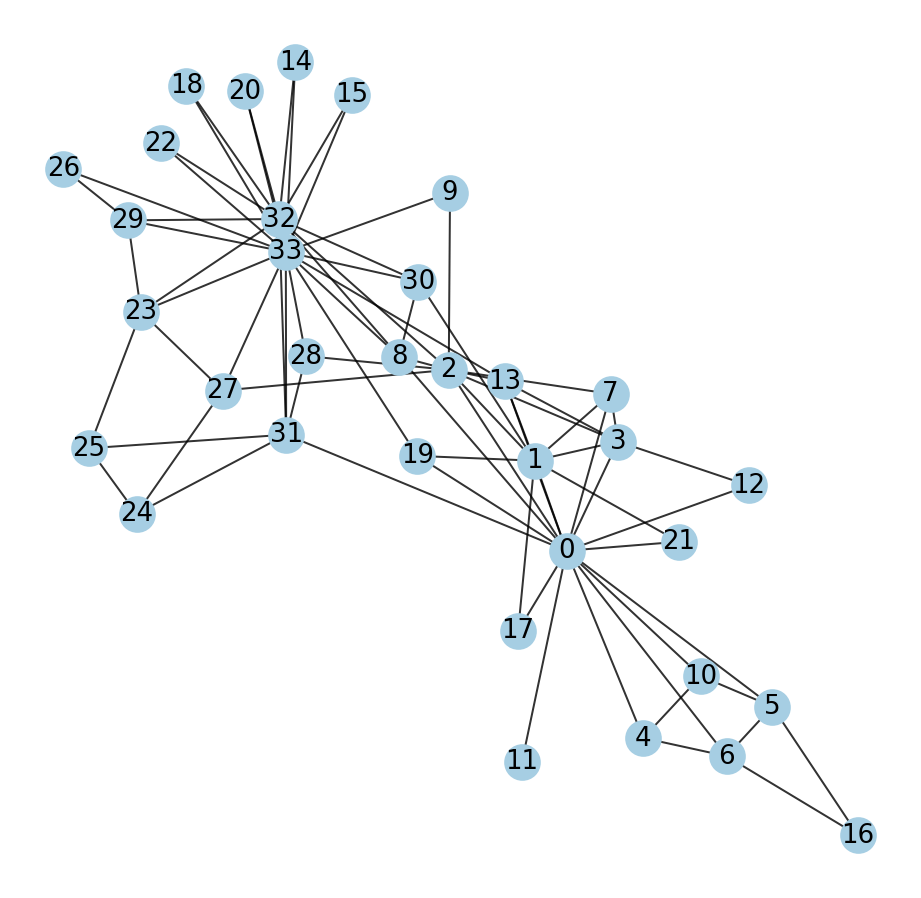

In [57]:
plt.figure(figsize=(8, 8)) 
pos = nx.spring_layout(network, seed=10, iterations=5000)
nx.draw_networkx_nodes(network, pos=pos, node_size=300, node_color='#a6cee3')
nx.draw_networkx_edges(network, pos, width=1.0, alpha=0.8)
nx.draw_networkx_labels(
    network, pos, 
    font_size=13)
plt.axis('off')
plt.show()

Let's guess the communities in this network.

In [58]:
eye_communities = {0: [0, 1, 3, 7, 11, 12, 17, 21, 4, 5, 6, 10, 16,],
                   1: [2, 19, 13, 9, 8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33, 23, 24, 25, 27, 28, 31]}
# eye_communities = {}

In [68]:
len(np.concatenate(list(eye_communities.values()))) == network.number_of_nodes()

True

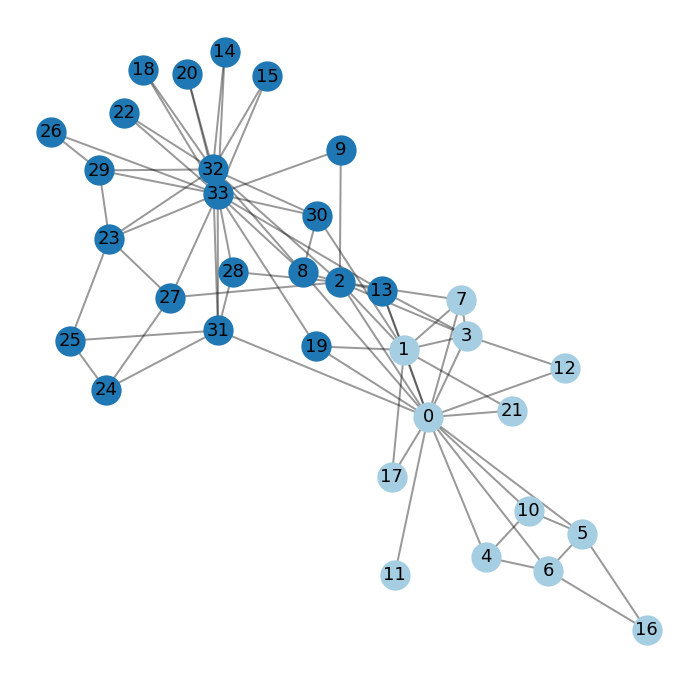

In [8]:
plt.figure(figsize=(6, 6)) 
for p in eye_communities:
    nx.draw_networkx_nodes(network, nodelist=eye_communities[p], pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)

plt.axis('off')
plt.show()

## Modularity

Let's measure the modularity of this guess.

$$Q = \dfrac{1}{2m}\sum_{ij}\left(A_{ij} - \dfrac{k_ik_j}{2m}\right)\delta(x_i, x_j)$$

In [9]:
eye_modularity = nx.algorithms.community.quality.modularity(network, list(eye_communities.values())) 
eye_modularity

0.31328073635765835

How an actual random case would be?

In [10]:
random_nodes = list(network.nodes)
np.random.shuffle(random_nodes)
random_communities = {0: random_nodes[:len(random_nodes)//2], 1: random_nodes[len(random_nodes)//2:]}

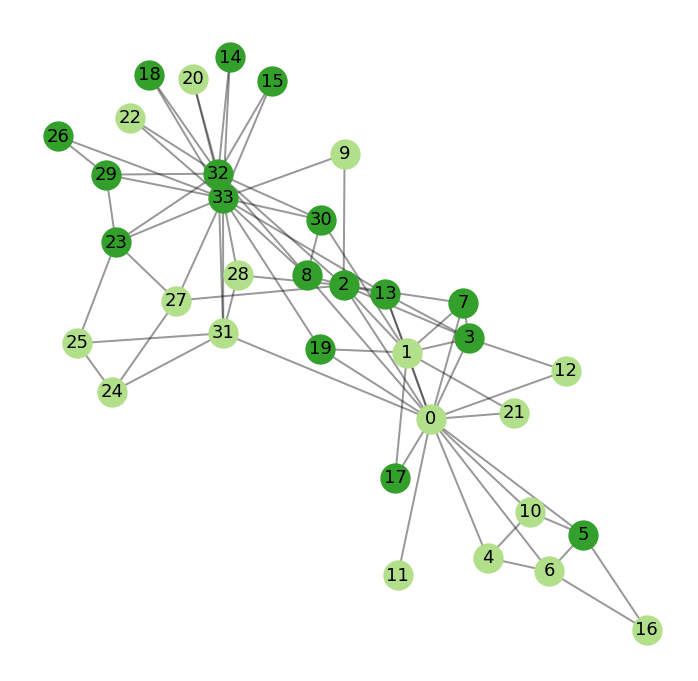

In [11]:
plt.figure(figsize=(6, 6)) 
for p in random_communities:
    nx.draw_networkx_nodes(network, nodelist=random_communities[p], pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)

plt.axis('off')
plt.show()

In [12]:
random_modularity = nx.algorithms.community.quality.modularity(network, list(random_communities.values())) 
random_modularity

0.06697896120973064

Modularity provides us a way to find the commmunities in the network. 

By the way, you can have fun with this <a href="01.1.1.1 Calculating modularity from scratch.ipynb">notebook</a> and calculate modularity from scratch!

## Community detection algorithms

### Modularity maximization: Clauset-Newman-Moore

In [13]:
greedy_communities = nx.algorithms.community.greedy_modularity_communities(network)

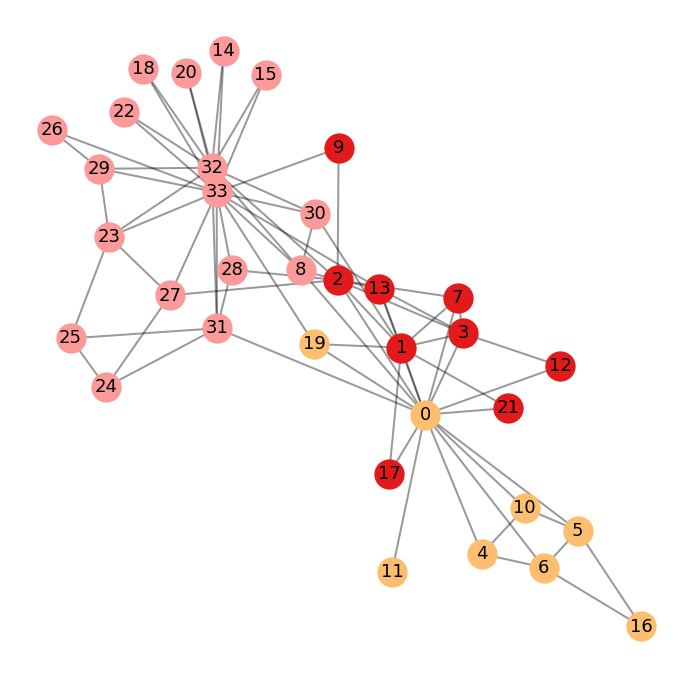

In [14]:
plt.figure(figsize=(6, 6)) 
for nodes in greedy_communities:
    nx.draw_networkx_nodes(network, nodelist=nodes, pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)
plt.axis('off')
plt.show()

In [15]:
greedy_modularity = nx.algorithms.community.quality.modularity(network, greedy_communities) 
greedy_modularity

0.3806706114398414

### Modularity maximization: the Louvain method

The Louvain method is a quite fast community detection algorithm based on modularity maximization.

> Blondel, V. D., Guillaume, J. L., Lambiotte, R., & Lefebvre, E. (2008). Fast unfolding of communities in large networks. Journal of statistical mechanics: theory and experiment, 2008(10), P10008.

In [16]:
communities_louvain = louvain.best_partition(network)
communities_louvain = to_community_list(communities_louvain)

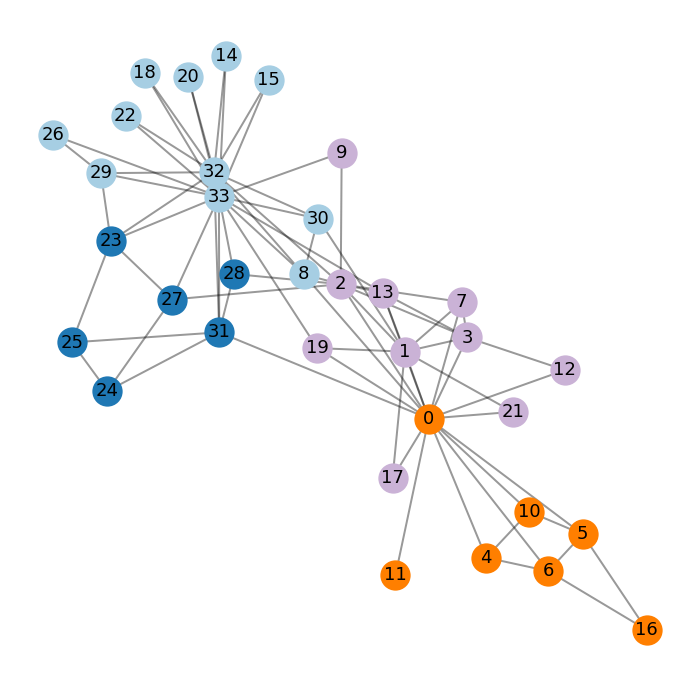

In [17]:
plt.figure(figsize=(6, 6)) 
for nodes in communities_louvain:
    nx.draw_networkx_nodes(network, nodelist=nodes, pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)

plt.axis('off')
plt.show()

In [18]:
louvain_modularity = nx.algorithms.community.quality.modularity(network, communities_louvain) 
louvain_modularity

0.39521696252465416

We can also adjust the size of the communities with the resolution parameter. 

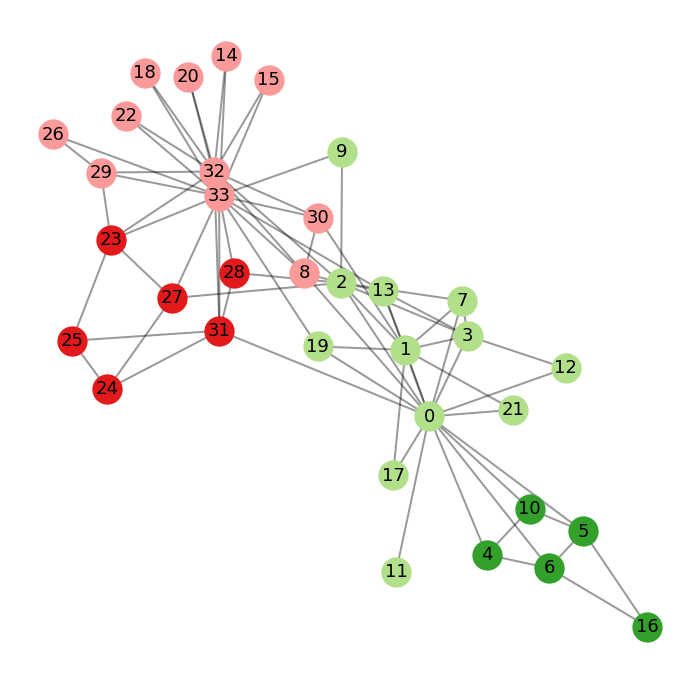

In [19]:
communities_louvain = louvain.best_partition(network, resolution=0.7)
communities_louvain = to_community_list(communities_louvain)
plt.figure(figsize=(6, 6)) 
for nodes in communities_louvain:
    nx.draw_networkx_nodes(network, nodelist=nodes, pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)

plt.axis('off')
plt.show()

## Other approaches 
### Centrality-based: Girvan-Newman



In [20]:
centrality_based_communities = nx.algorithms.community.girvan_newman(network)
centrality_based_communities = list(list(c) for c in next(centrality_based_communities))

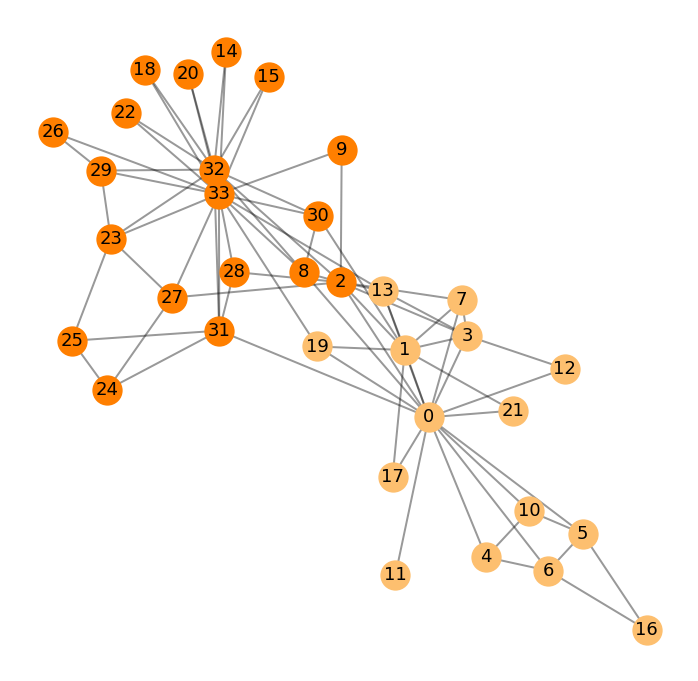

In [21]:
plt.figure(figsize=(6, 6)) 
for nodes in centrality_based_communities:
    nx.draw_networkx_nodes(network, nodelist=nodes, pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)
plt.axis('off')
plt.show()

In [22]:
centrality_based_modularity = nx.algorithms.community.quality.modularity(network, centrality_based_communities) 
centrality_based_modularity

0.359960552268243

### Label propagation

In [23]:
label_propagation_communities = nx.algorithms.community.label_propagation_communities(network)
label_propagation_communities = list(list(c) for c in label_propagation_communities)

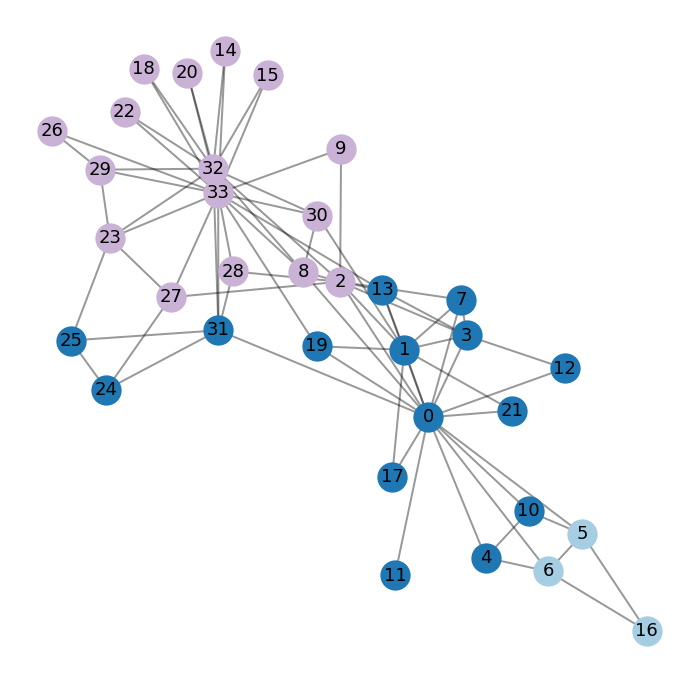

In [24]:
plt.figure(figsize=(6, 6)) 
for nodes in label_propagation_communities:
    nx.draw_networkx_nodes(network, nodelist=nodes, pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(network, pos=pos, width=1.0, alpha=0.4)
nx.draw_networkx_labels(network, pos, font_size=9)
plt.axis('off')
plt.show()

In [25]:
label_propagation_modularity = nx.algorithms.community.quality.modularity(network, centrality_based_communities) 
label_propagation_modularity

0.359960552268243

## Comparing methods

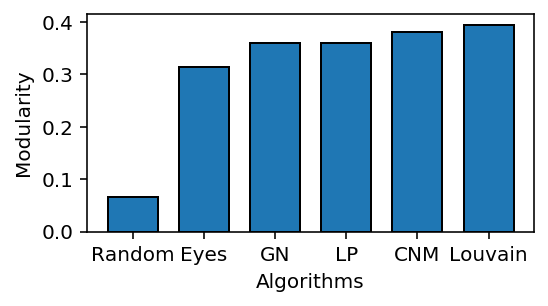

In [26]:
plt.figure(figsize=(4, 2))
plt.bar(range(6), [random_modularity, 
                   eye_modularity, 
                   centrality_based_modularity, 
                   label_propagation_modularity,
                   greedy_modularity,
                   louvain_modularity],
        width=0.7, edgecolor='k')
plt.xticks(range(6), ['Random', 'Eyes', 'GN', 'LP', 'CNM', 'Louvain']);
plt.ylabel(r'Modularity');
plt.xlabel('Algorithms');

## Other measures

### Performance
The *performance* of a partition refers to the ratio between the number of connections inside the communities plus the non-edges between communities and the total number of potential edges. In a graph, a non-edge a pair of nodes that are not adjacent. 

* `nx.algorithms.community.quality.intra_community_edges` gives us the number of intra-community edges.
* `nx.algorithms.community.quality.inter_community_edges` gives us the number of inter-community edges.
* `nx.algorithms.community.quality.inter_community_non_edges` gives us the number of intra-community non-edges.

In [27]:
# intra_community_edges 

In [28]:
# inter_community_non_edges 

In [29]:
# n

In [30]:
# (intra_community_edges + inter_community_non_edges)/(n*(n - 1)/2)

In [31]:
nx.algorithms.community.quality.performance(network, centrality_based_communities) 

0.6114081996434938

### Coverage
The *coverage* of a partition refers to the ratio of the number of intra-community edges and the total number of edges.

In [32]:
# intra_community_edges / network.number_of_edges()

In [33]:
nx.algorithms.community.quality.coverage(network, centrality_based_communities) 

0.8717948717948718

## Limits of modularity 


### Modularity maxima

- There are many close-to-optimal partitions.

### Resolution limit
If $k_A$ and $k_A$ are under the threshold $k\leq \sqrt{2L}$, the expected number of links between them is smaller than one. 

- Modularity maximization cannot detect communities that are smaller than the resolution limit.


In [34]:
def create_clique_ring(n_cliques, clique_size):
    number_of_nodes = n_cliques*clique_size
    many_cliques = nx.Graph()
    many_cliques.add_nodes_from(range(number_of_nodes))
    # create n cliques
    for k in range(n_cliques):
        for i in range(k*clique_size, (k + 1)*clique_size):
            for j in range(k*clique_size, (k + 1)*clique_size):
                many_cliques.add_edge(i, j)
    # add connection between cliques
    between_cliques = [((k+1)*clique_size - 1, ((k+1)*clique_size) % number_of_nodes) for k in range(n_cliques)]
    many_cliques.add_edges_from(between_cliques)
    return many_cliques

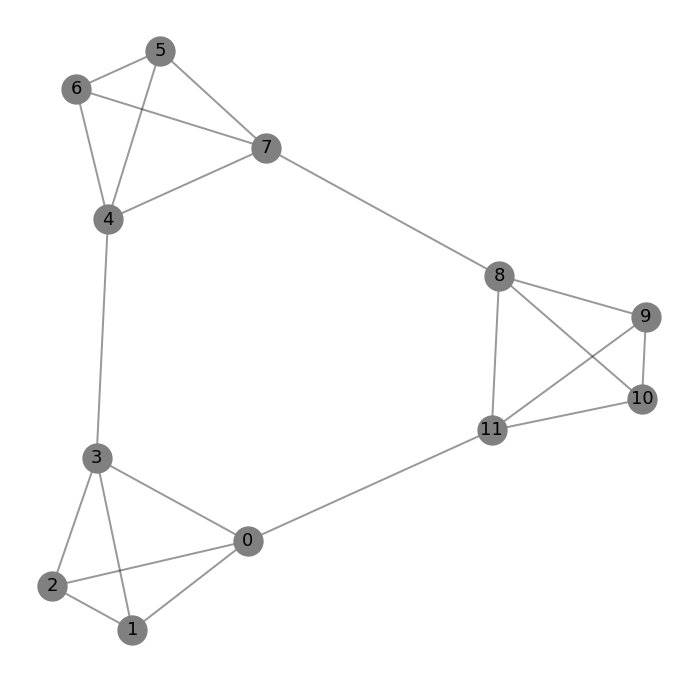

In [35]:
n_cliques, clique_size = 3, 4
clique_ring = create_clique_ring(n_cliques, clique_size)

plt.figure(figsize=(6, 6)) 
pos_ = nx.spring_layout(clique_ring, seed=10, iterations=5000)
nx.draw_networkx_nodes(clique_ring, pos=pos_,node_size=200, node_color="gray")
nx.draw_networkx_edges(clique_ring, pos=pos_, width=1.0, alpha=0.4)
nx.draw_networkx_labels(clique_ring, pos_, font_size=9)
plt.axis('off')
plt.show()

In [36]:
clique_size*(clique_size - 1) + 2, np.sqrt(2*clique_ring.number_of_edges())

(14, 8.12403840463596)

In [37]:
greedy_cliques = nx.algorithms.community.greedy_modularity_communities(clique_ring)

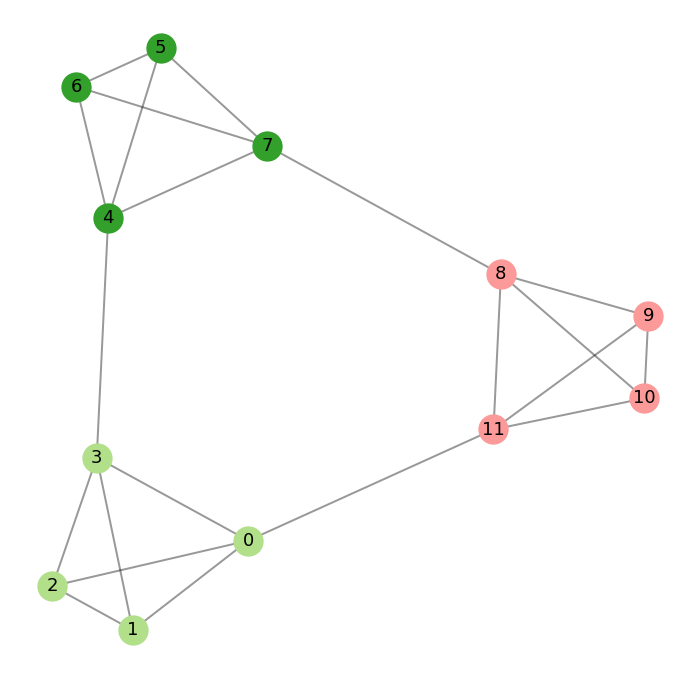

In [38]:
plt.figure(figsize=(6, 6)) 
pos_ = nx.spring_layout(clique_ring, seed=10, iterations=5000)
for nodes in greedy_cliques:
    nx.draw_networkx_nodes(clique_ring, nodelist=nodes, pos=pos_,node_size=200, node_color=next(colors))
nx.draw_networkx_edges(clique_ring, pos=pos_, width=1.0, alpha=0.4)
nx.draw_networkx_labels(clique_ring, pos_, font_size=9)
plt.axis('off')
plt.show()

In [39]:
n_cliques, clique_size = 35, 5
clique_ring = create_clique_ring(n_cliques, clique_size)

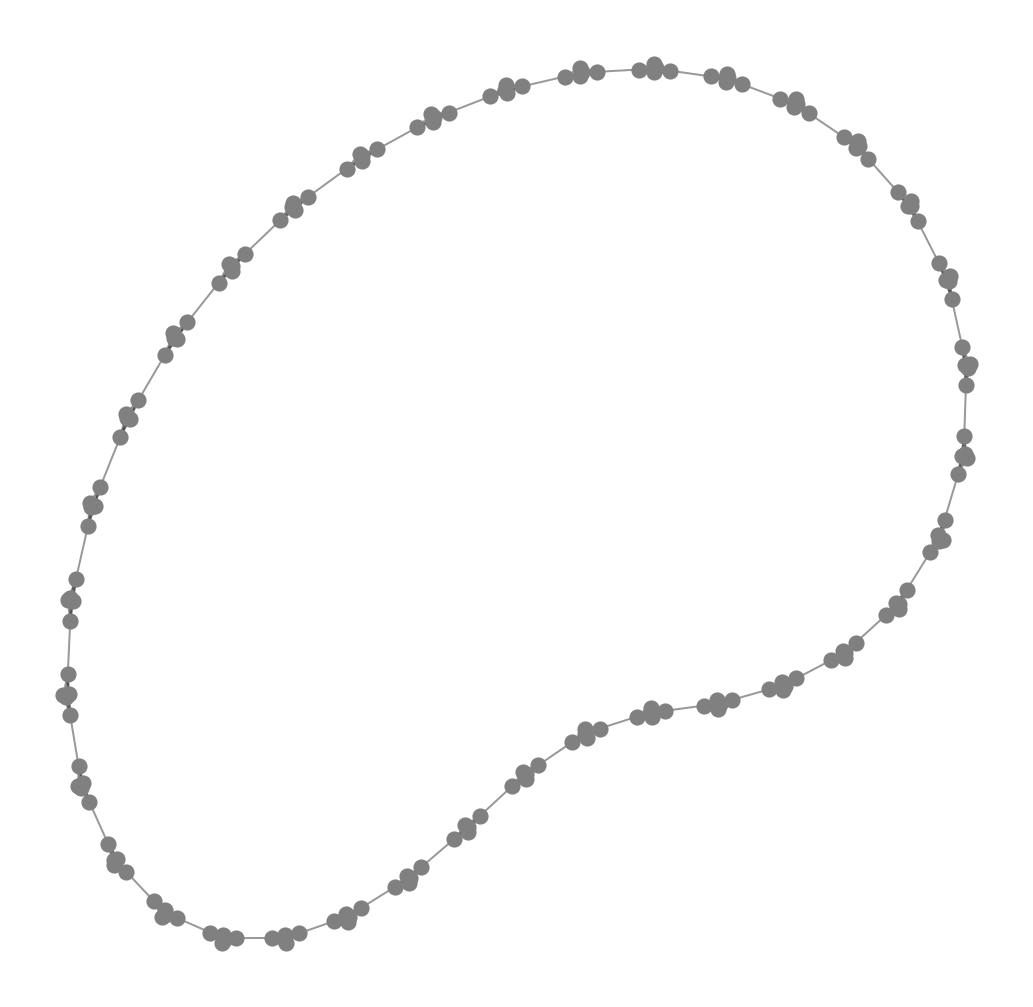

In [40]:
plt.figure(figsize=(9, 9)) 
pos_ = nx.spring_layout(clique_ring, seed=10, iterations=5000)
nx.draw_networkx_nodes(clique_ring, pos=pos_,node_size=50, node_color="gray")
nx.draw_networkx_edges(clique_ring, pos=pos_, width=1.0, alpha=0.4)
plt.axis('off')
plt.show()

In [41]:
clique_size*(clique_size - 1) + 2, np.sqrt(2*clique_ring.number_of_edges())

(22, 33.46640106136302)

In [42]:
greedy_cliques = nx.algorithms.community.greedy_modularity_communities(clique_ring)

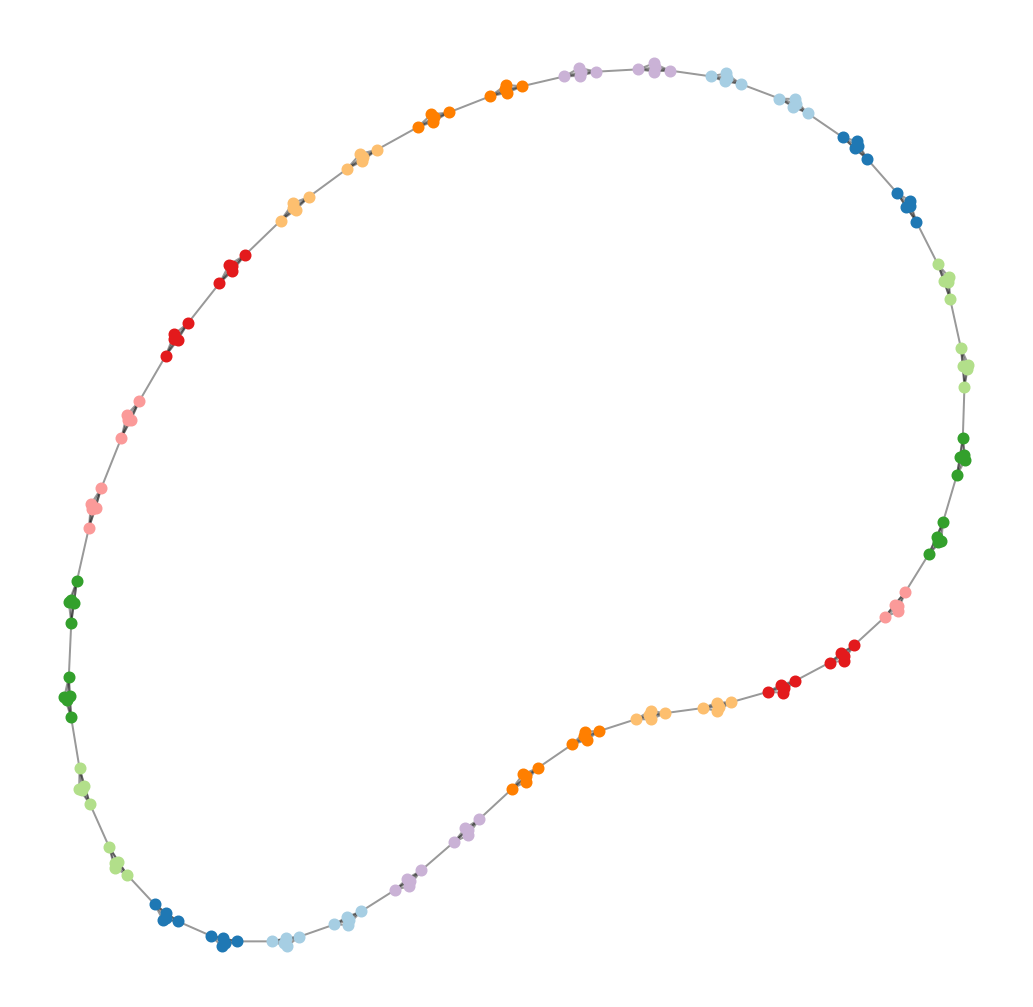

In [43]:
plt.figure(figsize=(9, 9)) 
pos_ = nx.spring_layout(clique_ring, seed=10, iterations=5000)
for nodes in greedy_cliques:
    nx.draw_networkx_nodes(clique_ring, nodelist=nodes, pos=pos_,node_size=25, node_color=next(colors))
nx.draw_networkx_edges(clique_ring, pos=pos_, width=1.0, alpha=0.4)
plt.axis('off')
plt.show()